In [43]:
!pip install openpyxl

In [42]:
import requests
import os
from PIL import Image
from IPython.display import IFrame
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import json
from openpyxl import Workbook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

In [7]:
# Finding the job postings in different cities in USA and different programming languages

api_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json'
response = requests.get(api_url)
data = response.json()

def get_number_of_jobs_T(technology):
    number_of_jobs = 0
    for i in data:
        if technology in i.get('Key Skills'):
            number_of_jobs += 1
    return technology, number_of_jobs

def get_number_of_jobs_L(location):
    number_of_jobs = 0
    for i in data:
        if location in i.get('Location'):
            number_of_jobs += 1
    return location, number_of_jobs

wb = Workbook()
ws = wb.active

L = ["Austin", "Baltimore", "Boston", "Dallas", "Detroit", "Houston", "Los Angeles", "New Orleons", "New York", "Philadelphia", "San Francisco", "Seattle", "Washington DC"]
for location in L:
    ws.append(list(get_number_of_jobs_L(location)))

tech = ["C", "C++", "C#", "Java", "JavaScript", "Python", "Scala", "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"]
for t in tech:
    ws.append(list(get_number_of_jobs_T(t)))

wb.save("job-postings.xlsx")

In [27]:
# Importing data set from ibm database for the upcoming data analysis

dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df = pd.read_csv(dataset_url)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [9]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11552.000000,1.073700e+04,1.073000e+04,11427.000000,9083.000000,11255.000000
mean,12362.212517,7.499932e+05,1.313340e+05,42.051851,4.762829,30.772394
std,7271.939210,9.639522e+06,2.943245e+05,24.528561,4.548401,7.392780
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6011.500000,2.500000e+04,2.672700e+04,40.000000,2.000000,25.000000
50%,12323.500000,6.500000e+04,5.774400e+04,40.000000,4.000000,29.000000
75%,18686.500000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [10]:
# Data cleaning

dup = df[df.duplicated()]
dup.shape

(154, 85)

In [13]:
df.drop_duplicates(inplace = True)
dup2 = df[df.duplicated()]
dup2.shape
df.replace("", np.nan)
df_ = df.isnull()

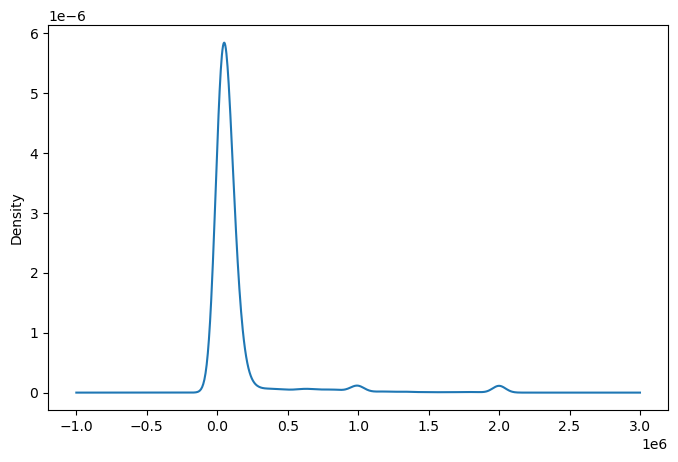

In [15]:
# The distribution curve for the column ConvertedComp
df['ConvertedComp'].plot(kind='kde', figsize=(8,5))
plt.show()

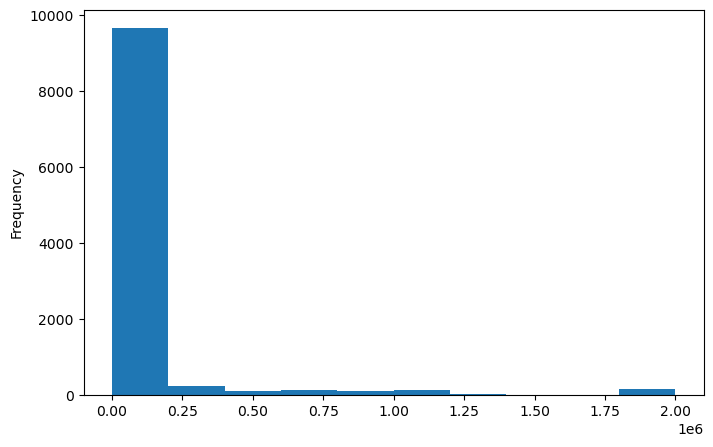

In [16]:
# Histogram for the column ConvertedComp
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))
plt.show()

<Axes: ylabel='Frequency'>

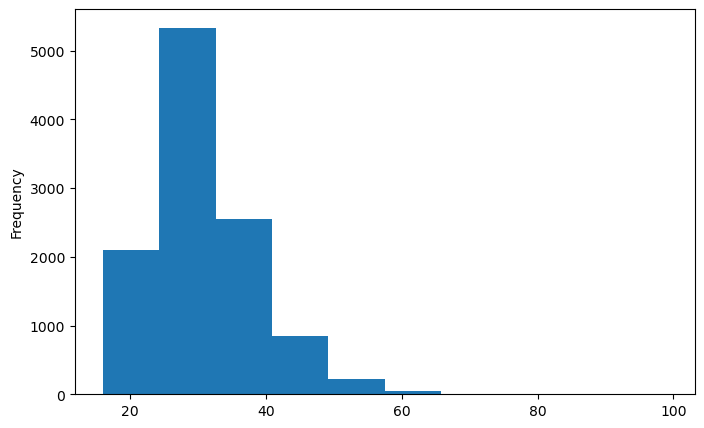

In [17]:
# Histogram of the column Age
df["Age"].plot(kind = "hist", figsize = (8, 5))

<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

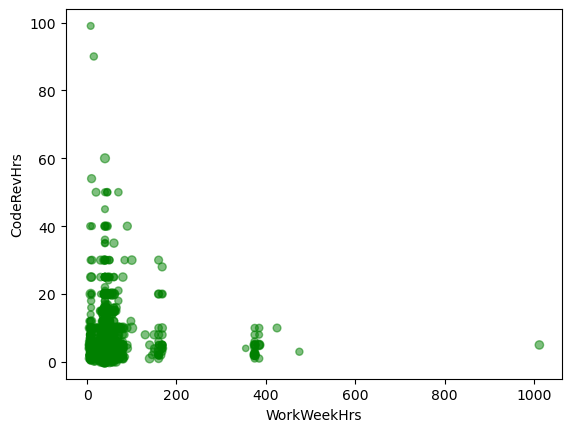

In [25]:
# Bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size
df.plot(kind = "scatter", x = "WorkWeekHrs", y = "CodeRevHrs", s = "Age", color = "green", alpha = 0.5)

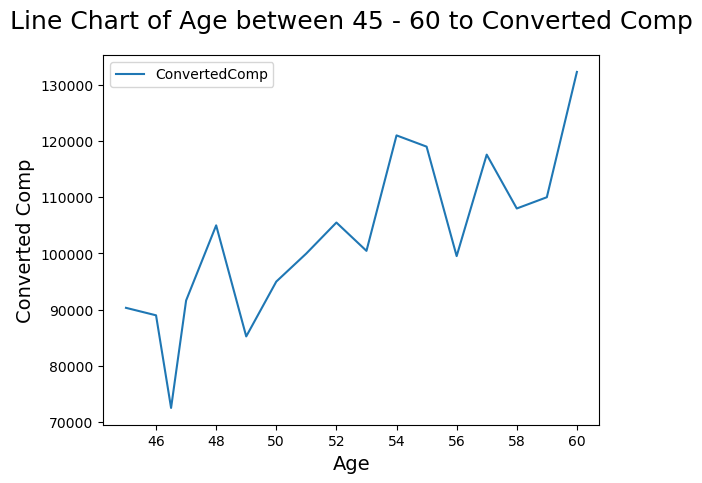

In [107]:
# Line chart of Age (between 45 - 60) to ConvertedComp

df_new = df.groupby(["Age"])["ConvertedComp"].median()
df_new = df_new.reset_index()
df_new.columns = ["Age", "ConvertedComp"]
condition = df_new["Age"] >= 45
df_new = df_new[condition]
condition2 = df_new["Age"] <= 60
df_new = df_new[condition2]

df_new.plot(kind = "line", x = "Age", y = "ConvertedComp")

plt.xlabel('Age', fontsize = 14)
plt.ylabel('Converted Comp', fontsize = 14)
plt.title('Line Chart of Age between 45 - 60 to Converted Comp', fontsize = 18, y = 1.05, loc = "center")

plt.show()

In [83]:
df_country = df[['Country']]
df_country_count = df_country.groupby('Country').size().reset_index(name='Count')
df_country_count.sort_values(by = ["Count"], inplace = True)

df_top5 = df_country_count.tail()

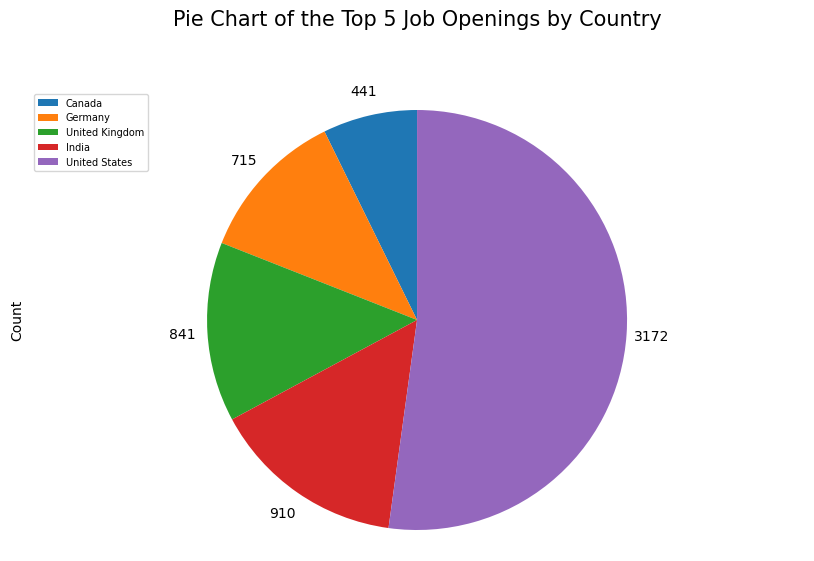

In [98]:
# Pie Chart of the Top 5 Job Openings by Country

def absolute_value(val):
    a = int(val/100. * df_top5['Count'].sum())
    return f'{a}'

df_top5['Count'].plot(kind='pie', 
                      figsize = (10, 6),
                      autopct = absolute_value,
                      startangle = 90,    
                      shadow = False,       
                      labels = None,
                      pctdistance = 1.12)

plt.title('Pie Chart of the Top 5 Job Openings by Country', y = 1.12, fontsize = 15) 
plt.axis('equal') 
plt.legend(labels = df_top5.index, loc = 'upper left', fontsize = 7) 

plt.show()